In [3]:
import keras
from keras.models import load_model
from keras import backend as K

BASE_DIR = 'D:/Yugant Basnet/FYP 30K/FYP Datasets 30K'
# WORKING_DIR = 'D:/Yugant Basnet/FYP 30K/Attention'
# WORKING_DIR = 'C:/Users/Admin/Downloads'
WORKING_DIR = 'D:/Yugant Basnet/COLLEGE RELATED/Year 3rd/FYP/Final Project/image_captioning_backend/caption_generator_send/model'
# WORKING_DIR = 'D:/Yugant Basnet/FYP 30K/FYP Working Dir'
model = keras.models.load_model(WORKING_DIR + '/' + 'model_sub_20_Att.h5')

ValueError: bad marshal data (unknown type code)

In [2]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 74)]         0           []                               
                                                                                                  
 embedding (Embedding)          (None, 74, 300)      5495700     ['input_3[0][0]']                
                                                                                                  
 dropout_1 (Dropout)            (None, 74, 300)      0           ['embedding[0][0]']              
                                                                                                  
 lstm (LSTM)                    (None, 74, 256)      570368      ['dropout_1[0][0]']              
                                                                                            

In [8]:
import pickle

# Load the tokenizer from the file
with open(WORKING_DIR + '/' + 'tokenizer.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)
    
print(tokenizer)
vocab_size = len(tokenizer.word_index) + 1

In [48]:
from keras.applications import EfficientNetB6
from keras.models import Model

en_model = EfficientNetB6()
en_model = Model(inputs=en_model.inputs, outputs=en_model.layers[-2].output)

In [5]:
en_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 528, 528, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 528, 528, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 528, 528, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 528, 528, 3)  0           ['normalization[0][0]']      

 block1c_dwconv (DepthwiseConv2  (None, 264, 264, 32  288        ['block1b_add[0][0]']            
 D)                             )                                                                 
                                                                                                  
 block1c_bn (BatchNormalization  (None, 264, 264, 32  128        ['block1c_dwconv[0][0]']         
 )                              )                                                                 
                                                                                                  
 block1c_activation (Activation  (None, 264, 264, 32  0          ['block1c_bn[0][0]']             
 )                              )                                                                 
                                                                                                  
 block1c_se_squeeze (GlobalAver  (None, 32)          0           ['block1c_activation[0][0]']     
 agePoolin

                                                                                                  
 block2b_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2b_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2b_activation (Activation  (None, 132, 132, 24  0          ['block2b_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2b_se_squeeze (GlobalAver  (None, 240)         0           ['block2b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block2b_s

 D)                             0)                               ']                               
                                                                                                  
 block2d_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2d_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2d_activation (Activation  (None, 132, 132, 24  0          ['block2d_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2d_se_squeeze (GlobalAver  (None, 240)         0           ['block2d_activation[0][0]']     
 agePooling2D)                                                                                    
          

 block2f_dwconv (DepthwiseConv2  (None, 132, 132, 24  2160       ['block2f_expand_activation[0][0]
 D)                             0)                               ']                               
                                                                                                  
 block2f_bn (BatchNormalization  (None, 132, 132, 24  960        ['block2f_dwconv[0][0]']         
 )                              0)                                                                
                                                                                                  
 block2f_activation (Activation  (None, 132, 132, 24  0          ['block2f_bn[0][0]']             
 )                              0)                                                                
                                                                                                  
 block2f_se_squeeze (GlobalAver  (None, 240)         0           ['block2f_activation[0][0]']     
 agePoolin

 )                                                                                                
                                                                                                  
 block3b_activation (Activation  (None, 66, 66, 432)  0          ['block3b_bn[0][0]']             
 )                                                                                                
                                                                                                  
 block3b_se_squeeze (GlobalAver  (None, 432)         0           ['block3b_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3b_se_reshape (Reshape)   (None, 1, 1, 432)    0           ['block3b_se_squeeze[0][0]']     
                                                                                                  
 block3b_s

 block3d_se_squeeze (GlobalAver  (None, 432)         0           ['block3d_activation[0][0]']     
 agePooling2D)                                                                                    
                                                                                                  
 block3d_se_reshape (Reshape)   (None, 1, 1, 432)    0           ['block3d_se_squeeze[0][0]']     
                                                                                                  
 block3d_se_reduce (Conv2D)     (None, 1, 1, 18)     7794        ['block3d_se_reshape[0][0]']     
                                                                                                  
 block3d_se_expand (Conv2D)     (None, 1, 1, 432)    8208        ['block3d_se_reduce[0][0]']      
                                                                                                  
 block3d_se_excite (Multiply)   (None, 66, 66, 432)  0           ['block3d_activation[0][0]',     
          

In [5]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [12]:
def predict_caption(model, image, tokenizer, max_length):
    in_text = 'startseq'
    for i in range(max_length):
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        if word is None:
            break
        in_text += " " + word
        if word == 'endseq':
            break
      
    return in_text

In [16]:
from tqdm import tqdm

def beam_search_pred(model, image, tokenizer, max_length, K_beams=3, log=False):
    start = tokenizer.texts_to_sequences(['startseq'])[0]
    start_word = [[start, 0.0]]
    
    while len(start_word[0][0]) < max_length:
        temp = []
        for s in start_word:
            sequence = pad_sequences([s[0]], maxlen=max_length).reshape((1, max_length)) # sequence of most probable words
                                                                                         # based on the previous steps
            preds = model.predict([image.reshape(1, -1), sequence])
            word_preds = np.argsort(preds[0])[-K_beams:] # sort predictions based on the probability, then take the last
                                                         # K_beams items. words with the most probs
            
            # Getting the top <K_beams>(n) predictions and creating a 
            # new list so as to put them via the model again
            for w in word_preds:
                
                next_cap, prob = s[0][:], s[1]
                next_cap.append(w)
                if log:
                    prob += np.log(preds[0][w]) # assign a probability to each K words
                else:
                    prob += preds[0][w]
                temp.append([next_cap, prob])
        start_word = temp
        # Sorting according to the probabilities
        start_word = sorted(start_word, reverse=False, key=lambda l: l[1])

        # Getting the top words
        start_word = start_word[-K_beams:]
    
    start_word = start_word[-1][0]
    captions_ = [tokenizer.index_word[i] for i in start_word]

    final_caption = []
    
    for i in captions_:
        if i != 'endseq':
            final_caption.append(i)
        else:
            break
    
    final_caption = ' '.join(final_caption)
    return final_caption

 67%|██████████████████████████████████████████████████████▋                           | 10/15 [00:14<00:07,  1.42s/it]


ValueError: num must be an integer with 1 <= num <= 20, not 21

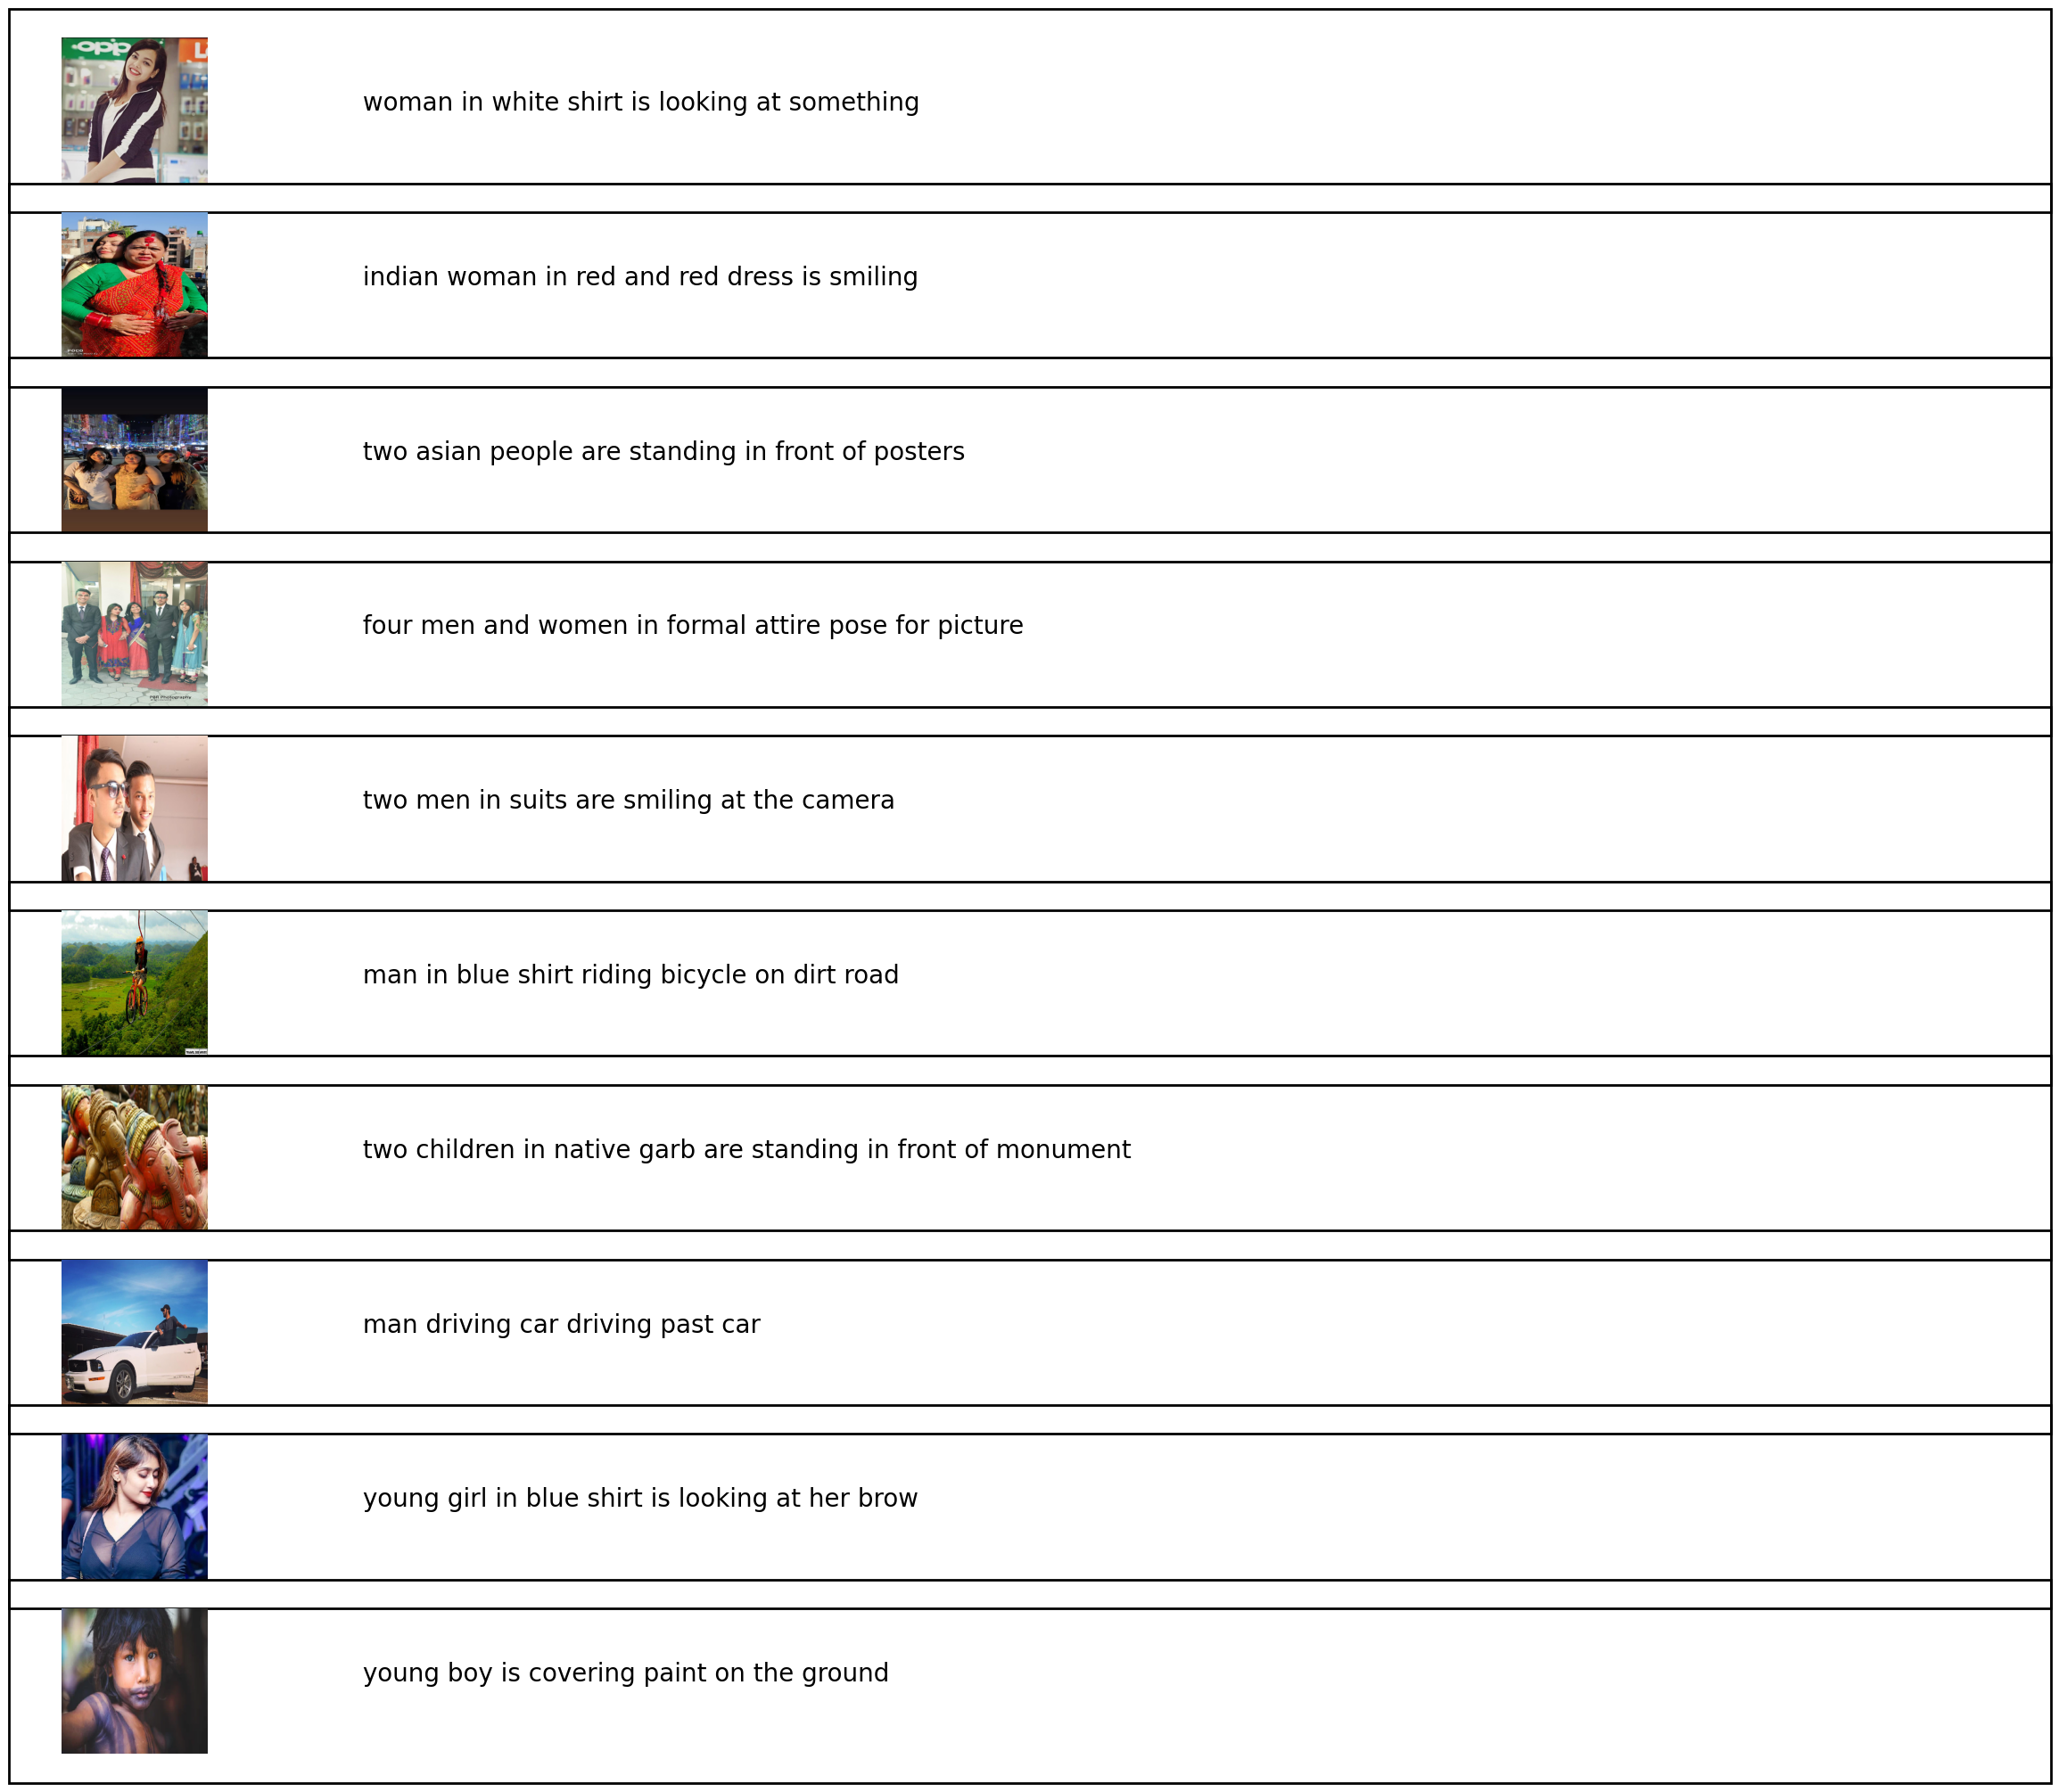

In [50]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import os

figure = plt.figure(figsize=(10,25))
n=10
c=1
max_length = 74

dir_path='D:/Yugant Basnet/FYP 30K/FYP Validiation Data'
val_dir=os.listdir(dir_path)

for i in tqdm(val_dir[0:15]):
    image_path = os.path.join(dir_path,i)
    img = mpimg.imread(image_path)
    loaded_image = load_img(image_path, target_size=(528, 528))
    image = img_to_array(loaded_image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = en_model.predict(image, verbose=0)
    pred_caption = predict_caption(model, feature, tokenizer, max_length)
#     beam_search = beam_search_pred(model, feature, tokenizer, max_length)
#     beam_3 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 5, log=False)
#     beam_5 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 15, log=False)
#     beam_log_3 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 5, log=True)
#     beam_log_5 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 15, log=True)
    final_caption=(pred_caption.replace("startseq","")).replace("endseq","")
    ax = figure.add_subplot(n, 2, c)
    plt.axis("off")
    ax.imshow(loaded_image)
    c += 1
    ax = figure.add_subplot(n, 2, c)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.text(0, 0.5 , final_caption.capitalize(), fontsize = 20)
#     ax.text(0, 0.75 , beam_3.capitalize(), fontsize = 10)
#     ax.text(0, 0.50 , beam_5.capitalize(), fontsize = 10)
#     ax.text(0, 0.25 , beam_log_3.capitalize(), fontsize = 10)
#     ax.text(0, 0 , beam_log_5.capitalize(), fontsize = 10)
    plt.axis("off")
    c += 1
    
    drawRect = ax.axis()
    rec = plt.Rectangle((drawRect[0] - 1.1, drawRect[2] - 0.2),(drawRect[1] - drawRect[0]) + 5.5, 
                        (drawRect[3] - drawRect[2]) + 0.4, fill = False, lw = 2)
    rec = ax.add_patch(rec)
    rec.set_clip_on(False)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:11<00:00,  1.25s/it]


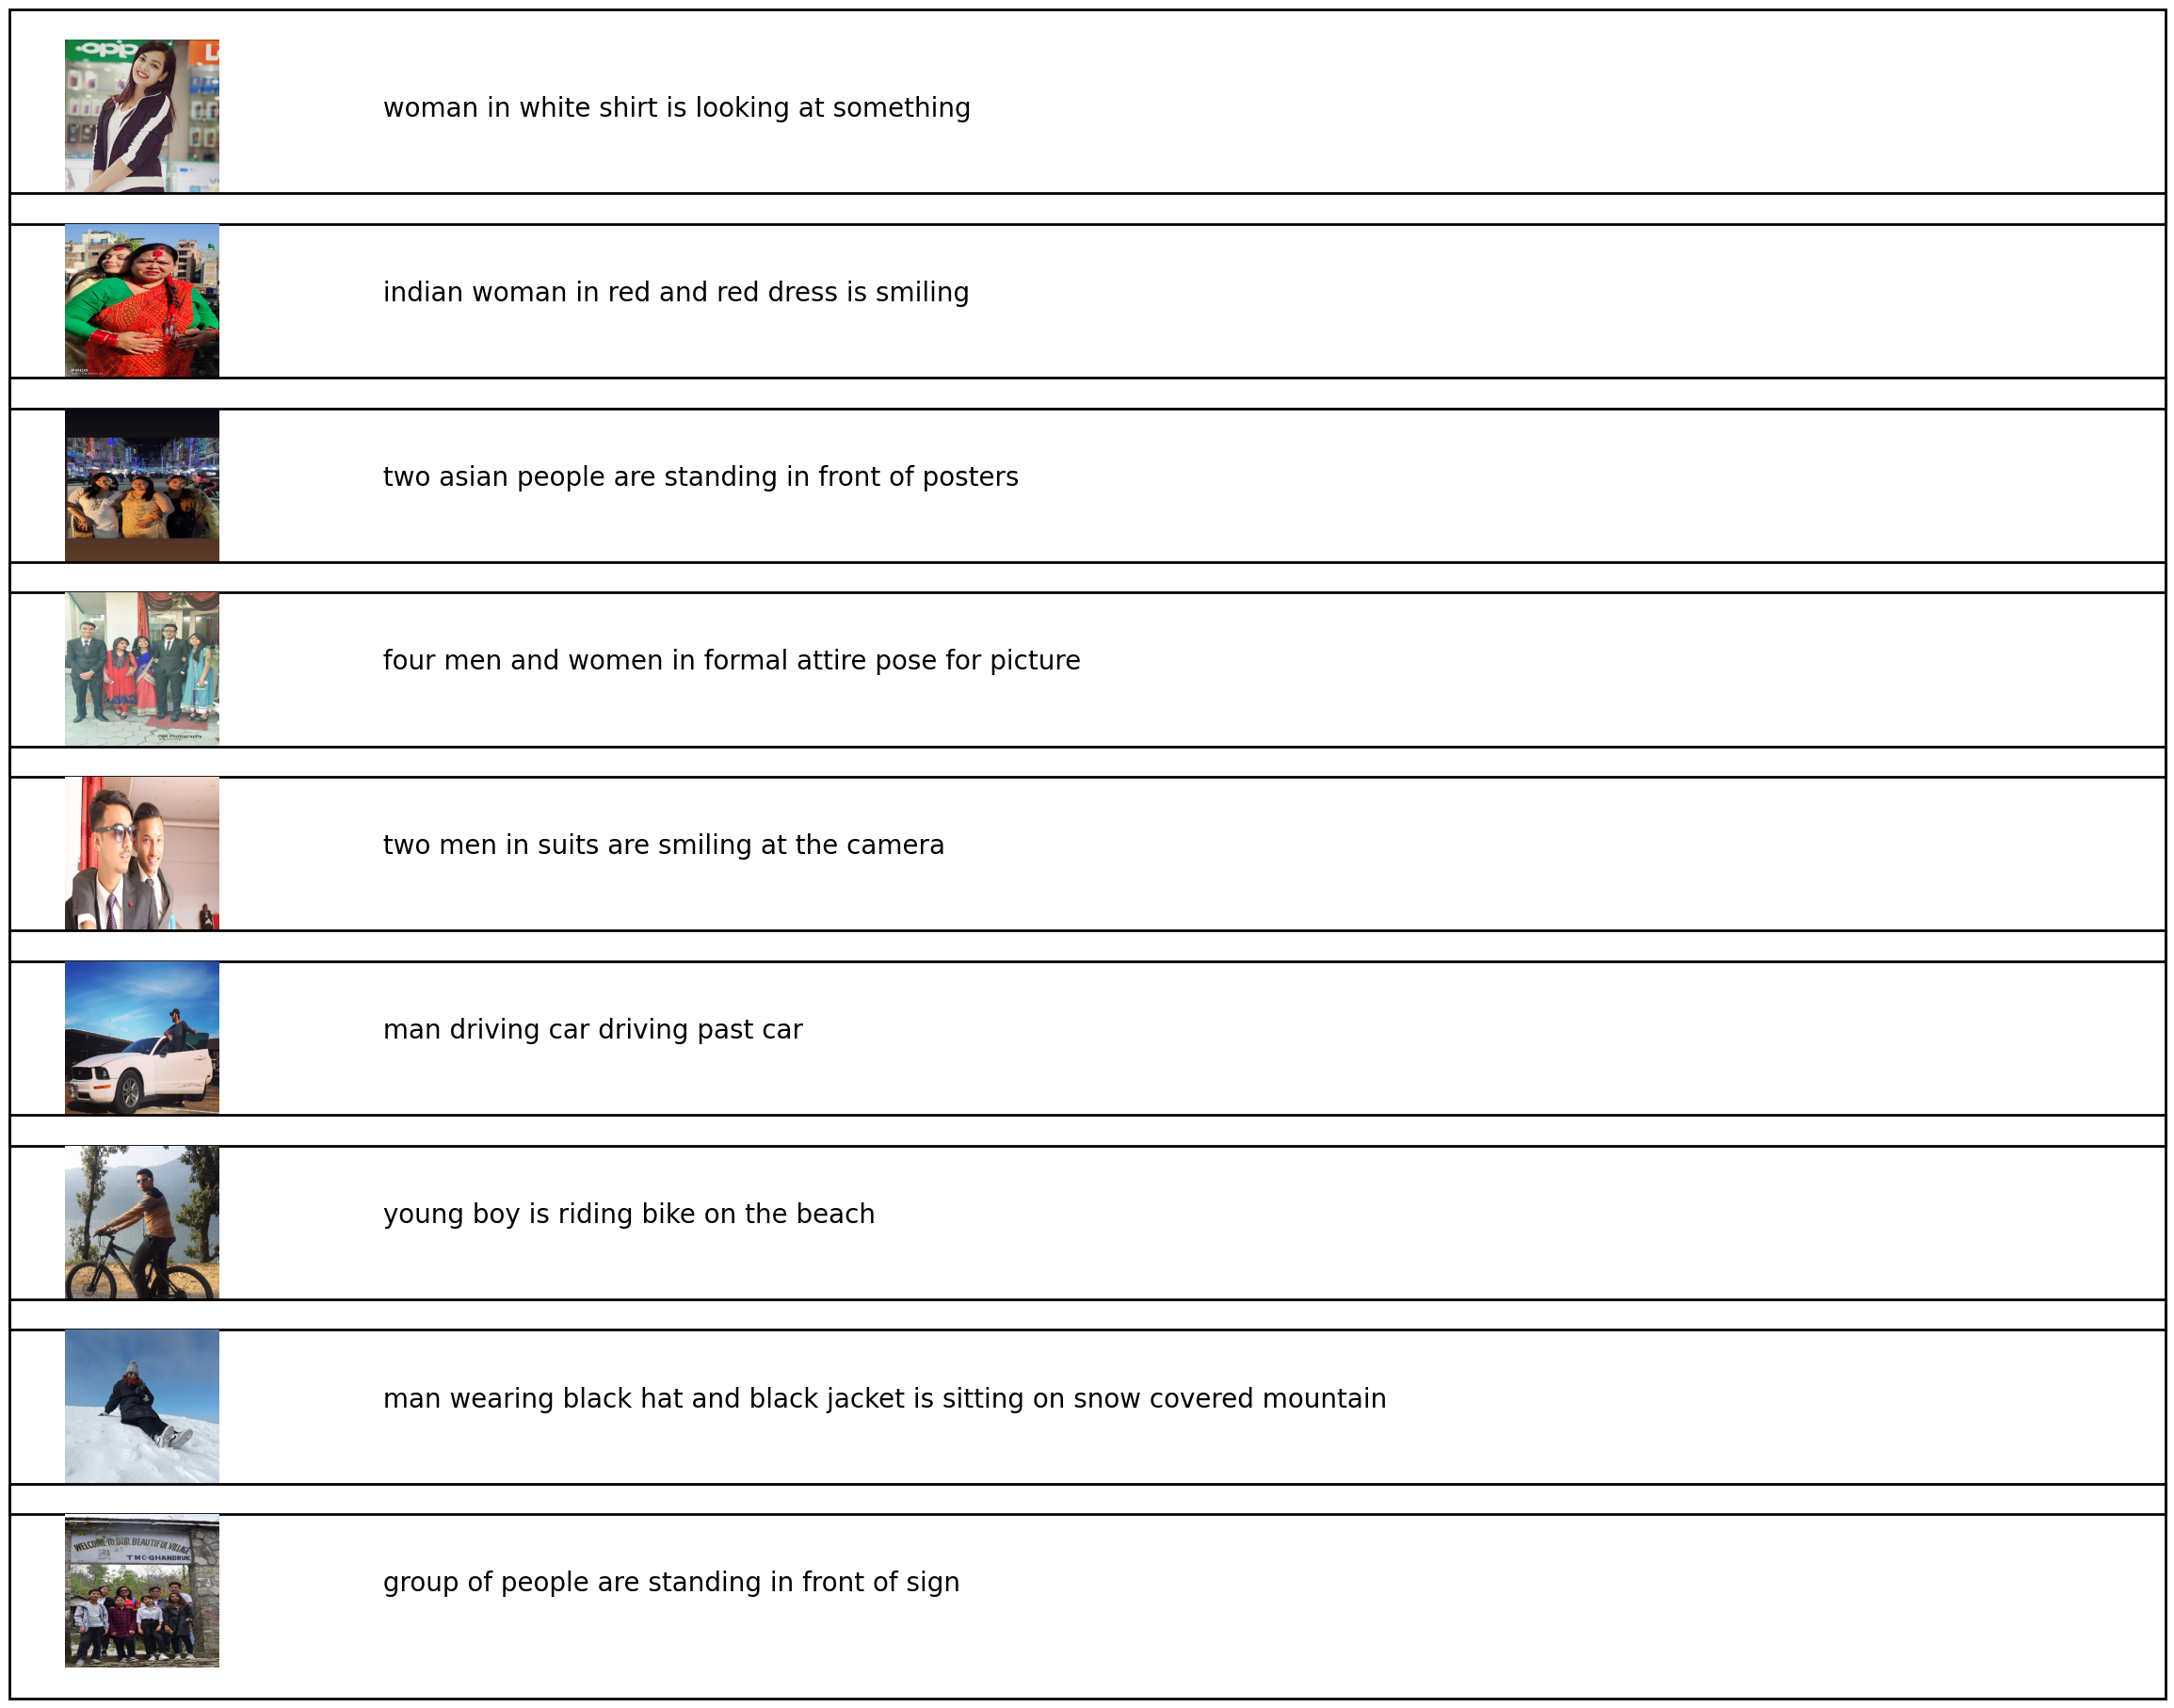

In [45]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import os

figure = plt.figure(figsize=(10,25))
n=10
c=1
max_length = 74

dir_path='D:/Yugant Basnet/FYP 30K/FYP Validiation Data'
val_dir=os.listdir(dir_path)

for i in tqdm(val_dir[0:9]):
    image_path = os.path.join(dir_path,i)
    img = mpimg.imread(image_path)
    loaded_image = load_img(image_path, target_size=(528, 528))
    image = img_to_array(loaded_image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = en_model.predict(image, verbose=0)
    pred_caption = predict_caption(model, feature, tokenizer, max_length)
#     beam_search = beam_search_pred(model, feature, tokenizer, max_length)
#     beam_3 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 5, log=False)
#     beam_5 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 15, log=False)
#     beam_log_3 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 5, log=True)
#     beam_log_5 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 15, log=True)
    final_caption=(pred_caption.replace("startseq","")).replace("endseq","")
    ax = figure.add_subplot(n, 2, c)
    plt.axis("off")
    ax.imshow(loaded_image)
    c += 1
    ax = figure.add_subplot(n, 2, c)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.text(0, 0.5 , final_caption.capitalize(), fontsize = 20)
#     ax.text(0, 0.75 , beam_3.capitalize(), fontsize = 10)
#     ax.text(0, 0.50 , beam_5.capitalize(), fontsize = 10)
#     ax.text(0, 0.25 , beam_log_3.capitalize(), fontsize = 10)
#     ax.text(0, 0 , beam_log_5.capitalize(), fontsize = 10)
    plt.axis("off")
    c += 1
    
    drawRect = ax.axis()
    rec = plt.Rectangle((drawRect[0] - 1.1, drawRect[2] - 0.2),(drawRect[1] - drawRect[0]) + 5.5, 
                        (drawRect[3] - drawRect[2]) + 0.4, fill = False, lw = 2)
    rec = ax.add_patch(rec)
    rec.set_clip_on(False)
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:33<00:00,  3.73s/it]


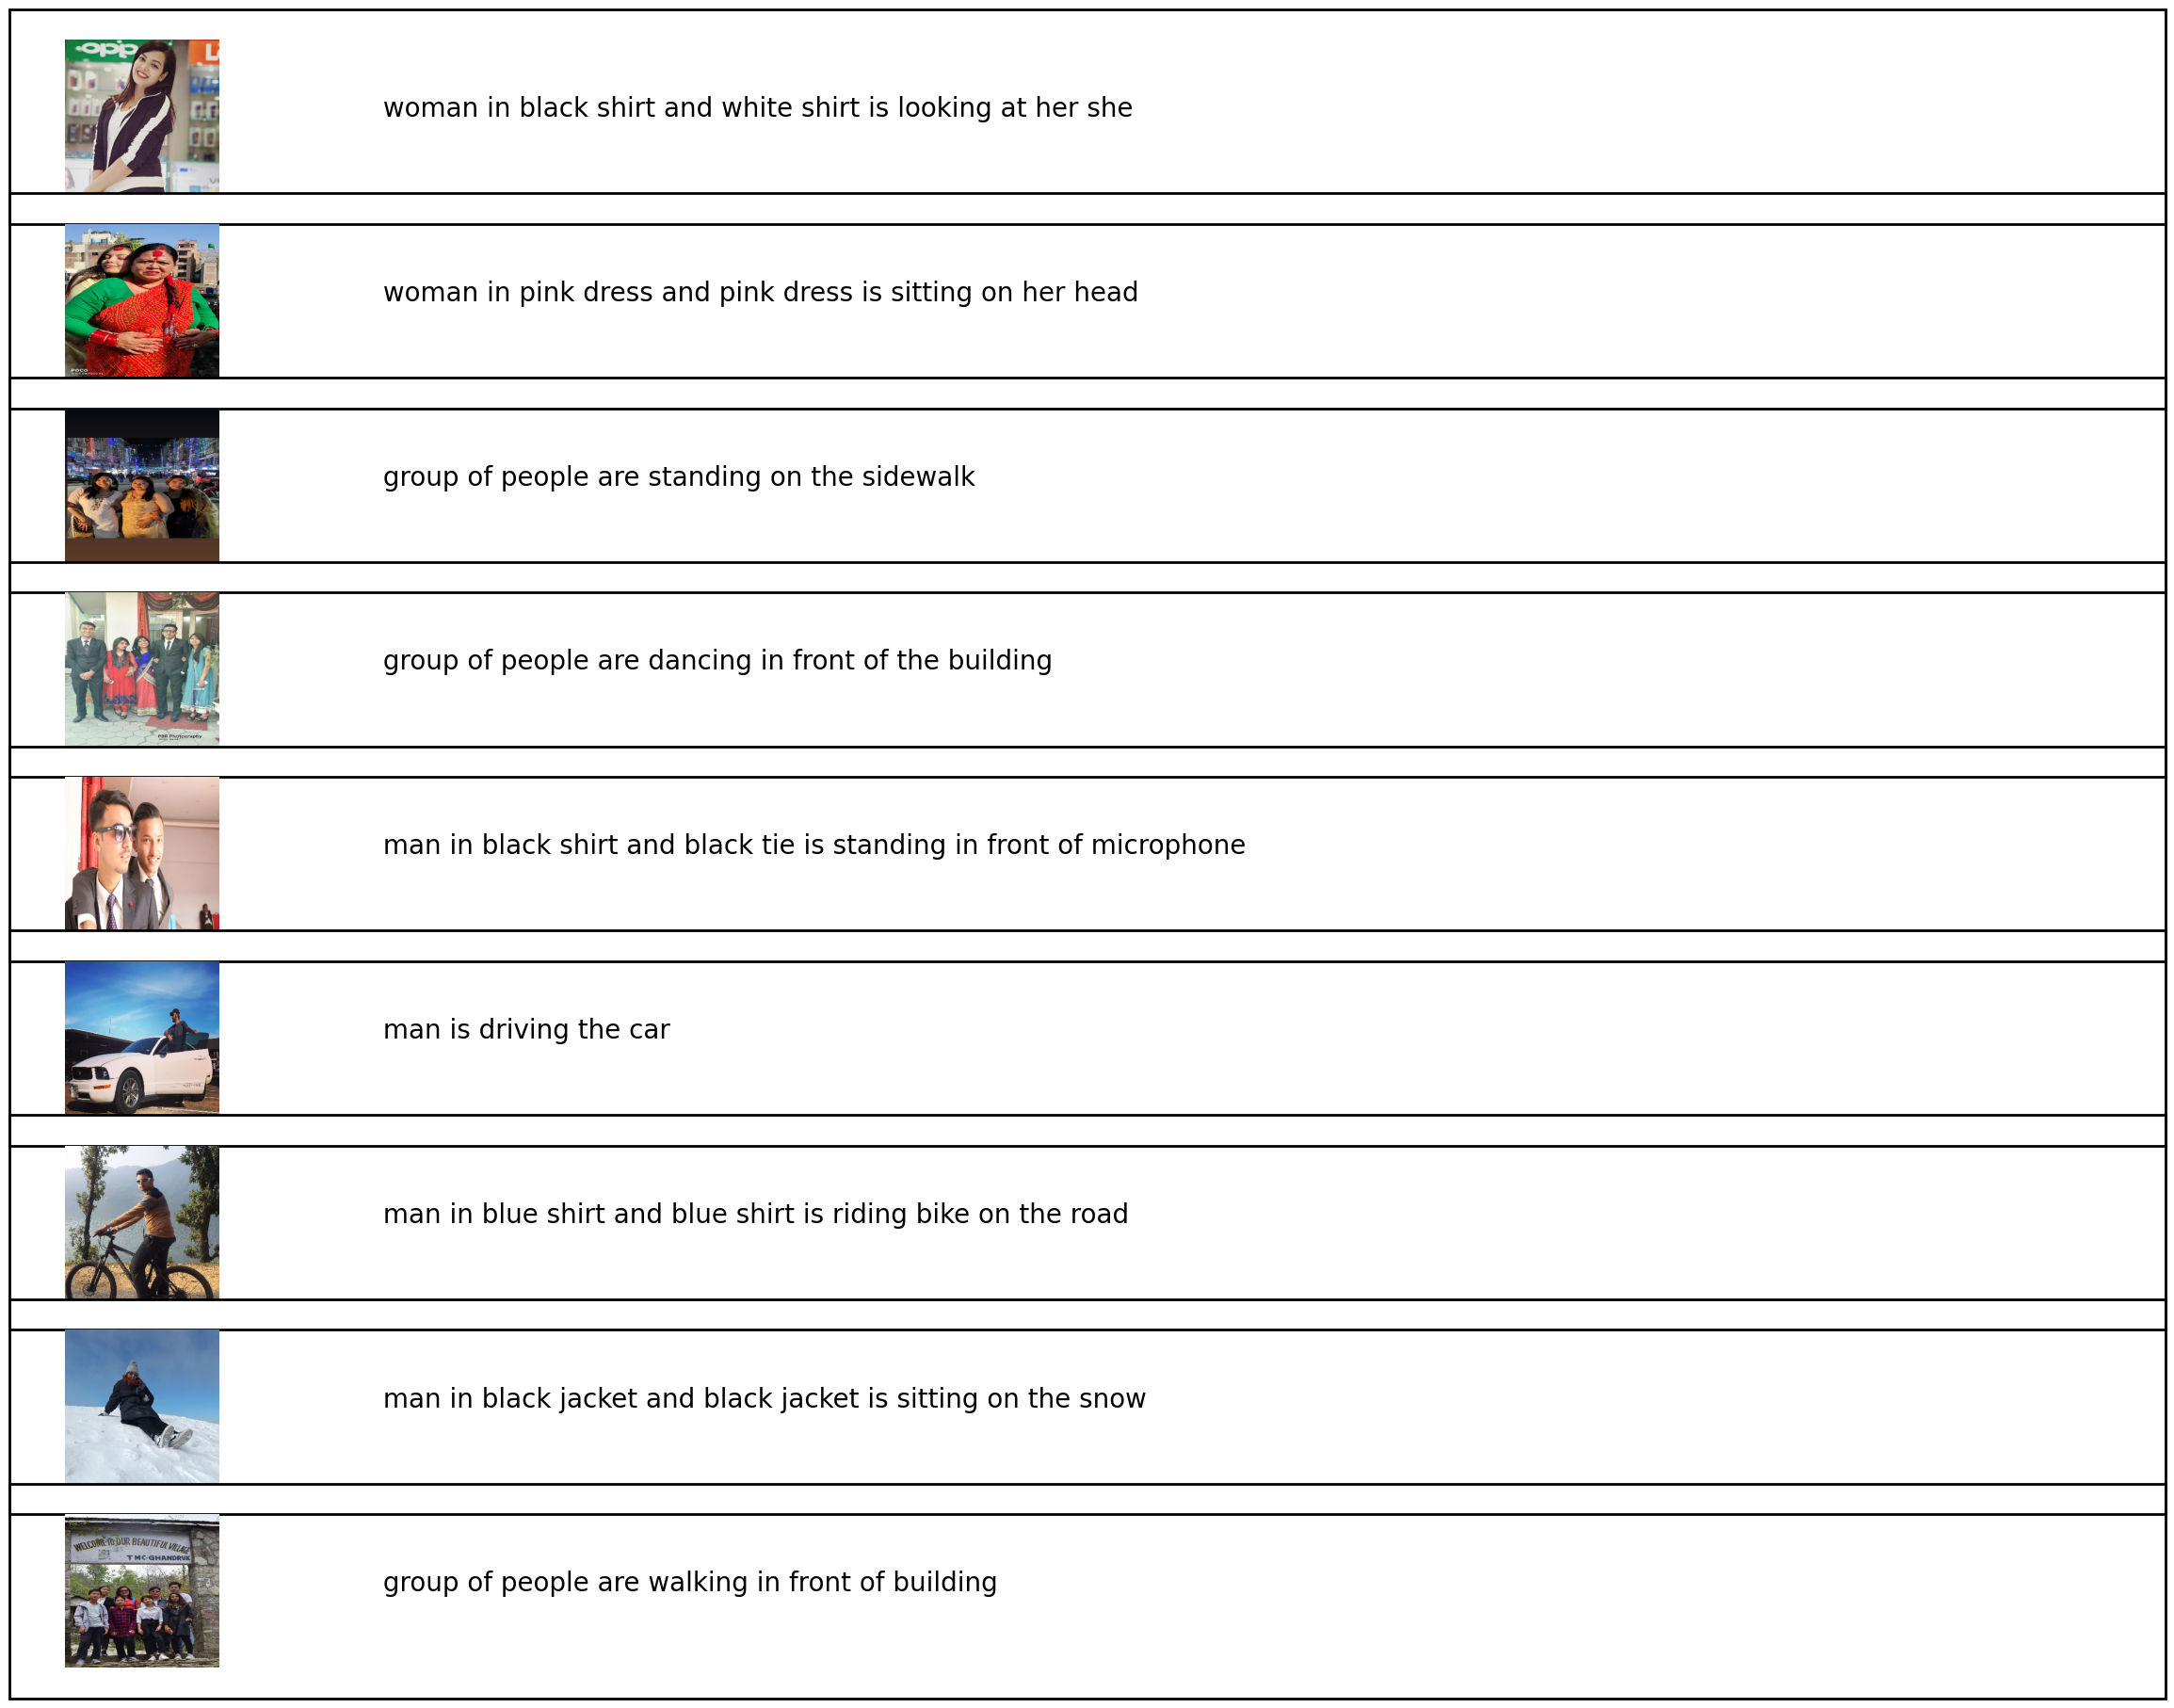

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import os

figure = plt.figure(figsize=(10,25))
n=10
c=1
max_length = 74

dir_path='D:/Yugant Basnet/FYP 30K/FYP Validiation Data'
val_dir=os.listdir(dir_path)

for i in tqdm(val_dir[0:9]):
    image_path = os.path.join(dir_path,i)
    img = mpimg.imread(image_path)
    loaded_image = load_img(image_path, target_size=(380, 380))
    image = img_to_array(loaded_image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = en_model.predict(image, verbose=0)
    pred_caption = predict_caption(model, feature, tokenizer, max_length)
#     beam_search = beam_search_pred(model, feature, tokenizer, max_length)
#     beam_3 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 5, log=False)
#     beam_5 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 15, log=False)
#     beam_log_3 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 5, log=True)
#     beam_log_5 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 15, log=True)
    final_caption=(pred_caption.replace("startseq","")).replace("endseq","")
    ax = figure.add_subplot(n, 2, c)
    plt.axis("off")
    ax.imshow(loaded_image)
    c += 1
    ax = figure.add_subplot(n, 2, c)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.text(0, 0.5 , final_caption.capitalize(), fontsize = 20)
#     ax.text(0, 0.75 , beam_3.capitalize(), fontsize = 10)
#     ax.text(0, 0.50 , beam_5.capitalize(), fontsize = 10)
#     ax.text(0, 0.25 , beam_log_3.capitalize(), fontsize = 10)
#     ax.text(0, 0 , beam_log_5.capitalize(), fontsize = 10)
    plt.axis("off")
    c += 1
    
    drawRect = ax.axis()
    rec = plt.Rectangle((drawRect[0] - 1.1, drawRect[2] - 0.2),(drawRect[1] - drawRect[0]) + 5.5, 
                        (drawRect[3] - drawRect[2]) + 0.4, fill = False, lw = 2)
    rec = ax.add_patch(rec)
    rec.set_clip_on(False)
plt.show()

In [30]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tqdm import tqdm
import os

figure = plt.figure(figsize=(10,25))
n=10
c=1
max_length = 74

dir_path='D:/Yugant Basnet/FYP 30K/FYP Validiation Data'
val_dir=os.listdir(dir_path)

for i in tqdm(val_dir[0:4]):
    image_path = os.path.join(dir_path,i)
    img = mpimg.imread(image_path)
    loaded_image = load_img(image_path, target_size=(528, 528))
    image = img_to_array(loaded_image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = en_model.predict(image, verbose=0)
#     pred_caption = predict_caption(model, feature, tokenizer, max_length)
#     beam_search = beam_search_pred(model, feature, tokenizer, max_length)
    beam_3 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 6, log=False)
    beam_5 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 9, log=False)
    beam_log_3 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 6, log=True)
    beam_log_5 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = 9, log=True)
    final_caption=(pred_caption.replace("startseq","")).replace("endseq","")
    ax = figure.add_subplot(n, 2, c)
    plt.axis("off")
    ax.imshow(loaded_image)
    c += 1
    ax = figure.add_subplot(n, 2, c)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    #ax.text(0, 0.5 , final_caption.capitalize(), fontsize = 20)
    ax.text(0, 0.75 , beam_3.capitalize(), fontsize = 10)
    ax.text(0, 0.50 , beam_5.capitalize(), fontsize = 10)
    ax.text(0, 0.25 , beam_log_3.capitalize(), fontsize = 10)
    ax.text(0, 0 , beam_log_5.capitalize(), fontsize = 10)
    plt.axis("off")
    c += 1
    
    drawRect = ax.axis()
    rec = plt.Rectangle((drawRect[0] - 1.1, drawRect[2] - 0.2),(drawRect[1] - drawRect[0]) + 5.5, 
                        (drawRect[3] - drawRect[2]) + 0.4, fill = False, lw = 2)
    rec = ax.add_patch(rec)
    rec.set_clip_on(False)
plt.show()

  0%|                                                                                            | 0/4 [00:01<?, ?it/s]


NameError: name 'beam_search_pred' is not defined

<Figure size 1000x2500 with 0 Axes>

In [40]:
def import_loader():
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import numpy as np
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    from tensorflow.keras.applications.efficientnet import preprocess_input
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tqdm import tqdm
    import os

In [42]:
def beam_image_test(val1, val2):
    figure = plt.figure(figsize=(10,25))
    n=10
    c=1
    max_length = 74

    dir_path='D:/Yugant Basnet/FYP 30K/FYP Validiation Data'
    val_dir=os.listdir(dir_path)

    for i in tqdm(val_dir[0:4]):
        image_path = os.path.join(dir_path,i)
        img = mpimg.imread(image_path)
        loaded_image = load_img(image_path, target_size=(380, 380))
        image = img_to_array(loaded_image)
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        image = preprocess_input(image)
        feature = en_model.predict(image, verbose=0)
    #     pred_caption = predict_caption(model, feature, tokenizer, max_length)
    #     beam_search = beam_search_pred(model, feature, tokenizer, max_length)
        beam_3 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = val1, log=False)
        beam_5 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = val2, log=False)
        beam_log_3 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = val1, log=True)
        beam_log_5 = beam_search_pred(model, feature, tokenizer, max_length, K_beams = val2, log=True)
        final_caption=(pred_caption.replace("startseq","")).replace("endseq","")
        ax = figure.add_subplot(n, 2, c)
        plt.axis("off")
        ax.imshow(loaded_image)
        c += 1
        ax = figure.add_subplot(n, 2, c)
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        #ax.text(0, 0.5 , final_caption.capitalize(), fontsize = 20)
        ax.text(0, 0.75 , beam_3.capitalize(), fontsize = 10)
        ax.text(0, 0.50 , beam_5.capitalize(), fontsize = 10)
        ax.text(0, 0.25 , beam_log_3.capitalize(), fontsize = 10)
        ax.text(0, 0 , beam_log_5.capitalize(), fontsize = 10)
        plt.axis("off")
        c += 1

        drawRect = ax.axis()
        rec = plt.Rectangle((drawRect[0] - 1.1, drawRect[2] - 0.2),(drawRect[1] - drawRect[0]) + 5.5, 
                            (drawRect[3] - drawRect[2]) + 0.4, fill = False, lw = 2)
        rec = ax.add_patch(rec)
        rec.set_clip_on(False)
    plt.show()

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


 25%|████████████████████▊                                                              | 1/4 [03:18<09:56, 198.91s/it]

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


 50%|█████████████████████████████████████████▌                                         | 2/4 [06:41<06:41, 200.85s/it]

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 29ms/step


 75%|██████████████████████████████████████████████████████████████▎                    | 3/4 [09:53<03:17, 197.11s/it]

1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [13:15<00:00, 198.98s/it]


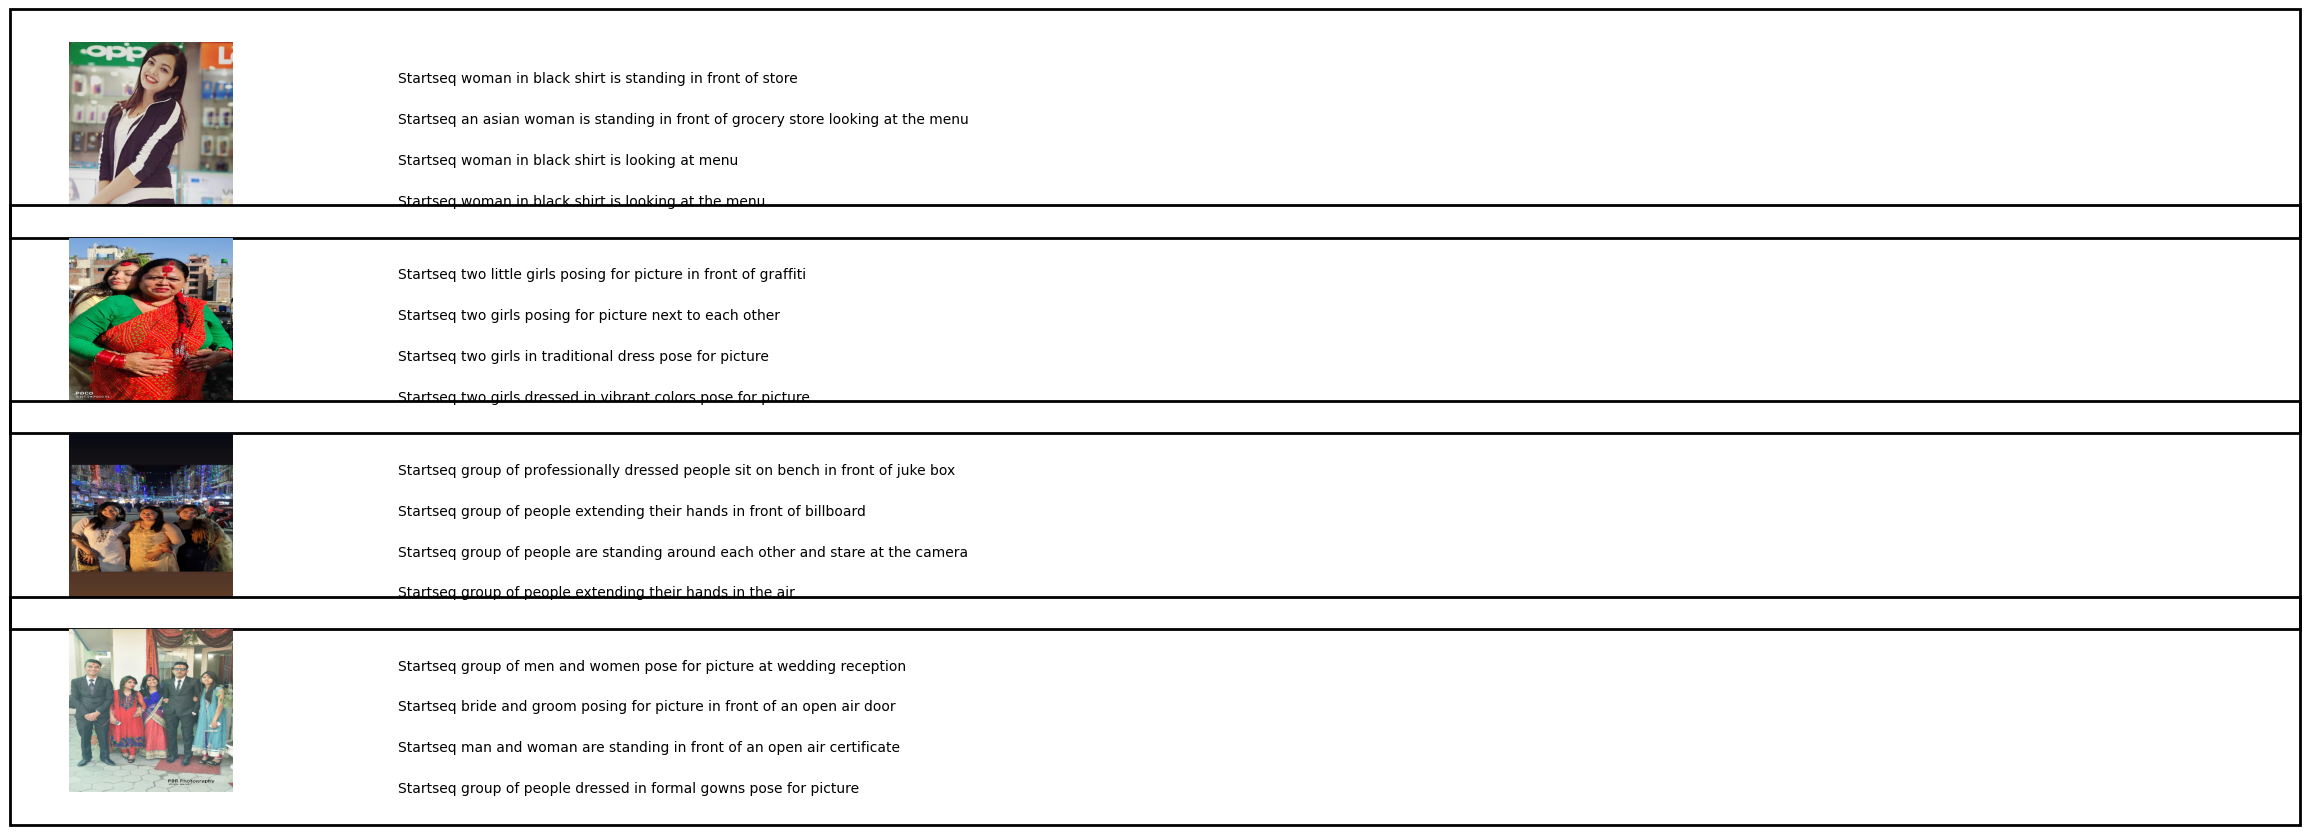

In [44]:
import_loader()
beam_image_test(5, 15)

In [1]:
model = keras.models.load_model(WORKING_DIR + '/' + 'model_sub_0.h5')

NameError: name 'keras' is not defined

In [ ]:
beam_image_test(5, 15)

  0%|                                                                                            | 0/4 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 34ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


 25%|████████████████████▊                                                              | 1/4 [03:27<10:23, 207.68s/it]

1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 31ms/step


 50%|█████████████████████████████████████████▌                                         | 2/4 [06:59<06:59, 209.92s/it]

1/1 [==============================] - 0s 30ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 32ms/step


1/1 [==============================] - 0s 31ms/step


1/1 [==============================] - 0s 35ms/step


In [ ]:
model = keras.models.load_model(WORKING_DIR + '/' + 'model_sub_30.h5')

In [ ]:
beam_image_test(5, 15)

In [ ]:
model = keras.models.load_model(WORKING_DIR + '/' + 'model_sub_28.h5')

In [ ]:
beam_image_test(5, 15)